In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [3]:
def sinusoidal(pos, length):
    """
    Computes the sinusoidal positional encoding for a single position in a sequence.
    
    Args:
        pos (int): The position in the sequence to compute the encoding for.
        length (int): The dimensionality of the encoding.
        
    Returns:
        pos_enc (np.ndarray): The sinusoidal positional encoding for the specified position.
    """
    pos_enc = np.zeros((length,))
    for i in range(length):
        if i % 2 == 0:
            pos_enc[i] = np.sin(pos / 1000**(i/length))
        else:
            pos_enc[i] = np.cos(pos / 1000**((i-1)/length))
    return pos_enc

print(sinusoidal(1, 10000))

[0.84147098 0.54030231 0.84072424 ... 0.9999995  0.00100138 0.9999995 ]


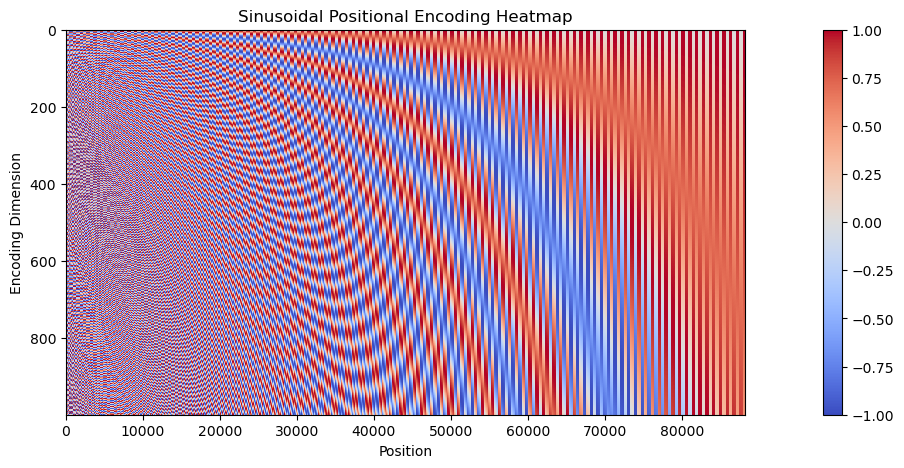

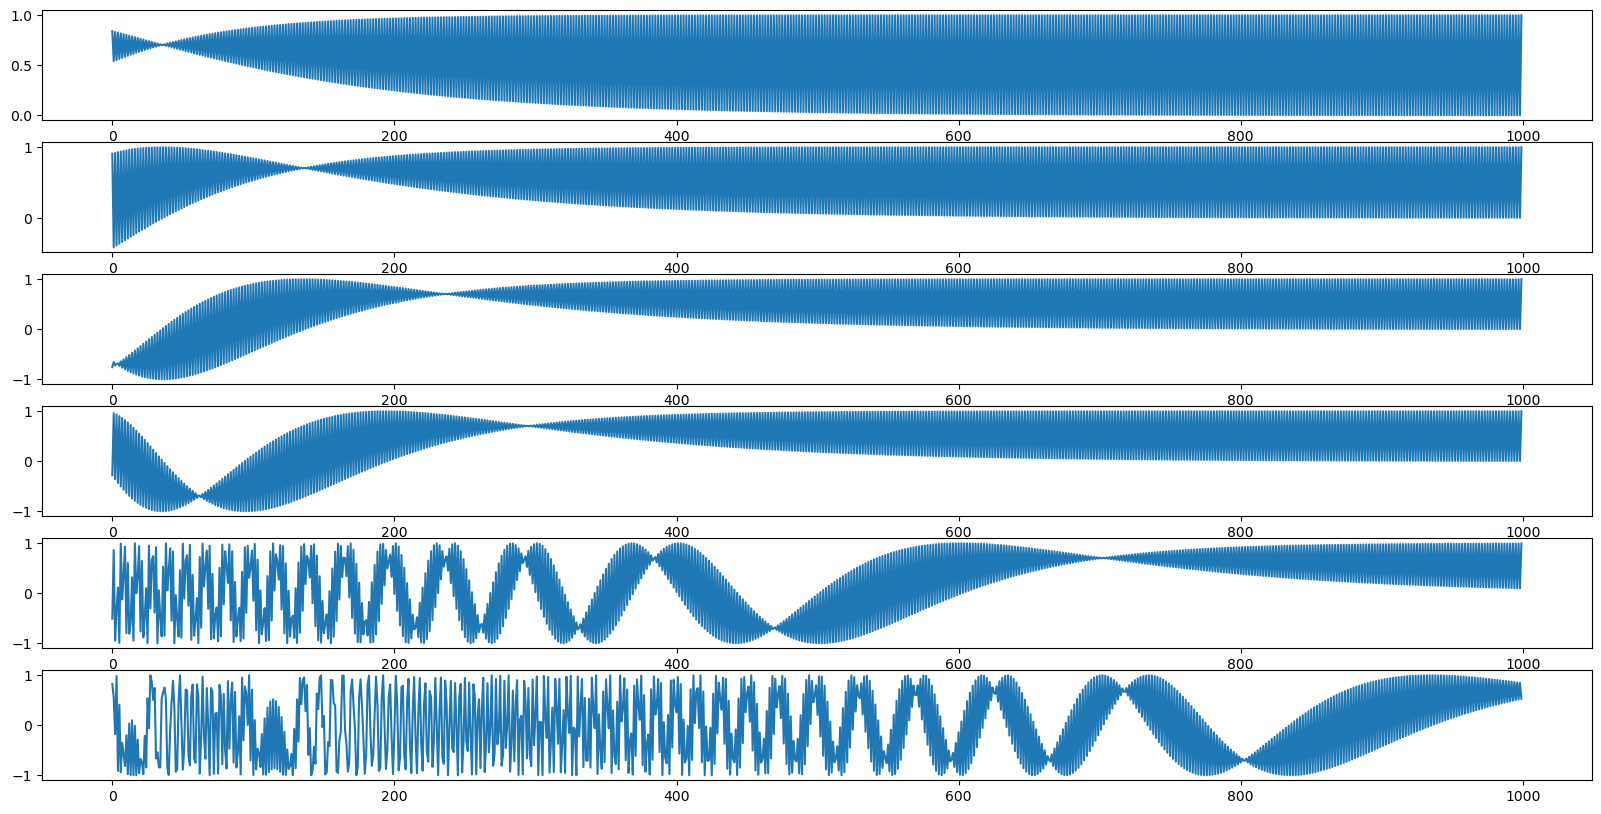

In [4]:
def plotSinusoidal(sinusoidal: np.array):
    """
    Plots a heatmap of a sinusoidal positional encoding.
    
    Args:
    - sinusoidal: A numpy array containing the sinusoidal encoding. The array should have shape (num_positions, encoding_dim).
    """
    # Create a new figure
    plt.figure(figsize=(20, 5))

    # Plot the heatmap
    heatmap = plt.imshow(sinusoidal, cmap='coolwarm', interpolation='nearest', aspect=50)

    # Add a colorbar to the plot
    plt.colorbar(heatmap)

    # Set the x and y labels
    plt.xlabel('Position')
    plt.ylabel('Encoding Dimension')

    # Set the title of the plot
    plt.title('Sinusoidal Positional Encoding Heatmap')

    # Show the plot
    plt.show()

plotSinusoidal(np.array([sinusoidal(i, 88200) for i in range(1000)]))
r = [1,2,4,6,100,1000]
fig, axs = plt.subplots(len(r),1, figsize=(20,10))
for i, j in enumerate(r):
    axs[i].plot(sinusoidal(j,1000))

In [17]:
a = torch.tensor([1,2,3,4])
a = a.unsqueeze(0).unsqueeze(0)
a = a.expand(10, 1, -1)

print(a.shape, a)

torch.Size([10, 1, 4]) tensor([[[1, 2, 3, 4]],

        [[1, 2, 3, 4]],

        [[1, 2, 3, 4]],

        [[1, 2, 3, 4]],

        [[1, 2, 3, 4]],

        [[1, 2, 3, 4]],

        [[1, 2, 3, 4]],

        [[1, 2, 3, 4]],

        [[1, 2, 3, 4]],

        [[1, 2, 3, 4]]])


In [79]:
from torch import sin, cos, pow
def sinforward(length: int, n: int, position: int) -> torch.Tensor:
    sinusoidal_encoding = torch.zeros((length,))
    for i in range(length):
        if i % 2 == 0:
            sinusoidal_encoding[i] = np.sin(position / 1000**(i/length))
        else:
            sinusoidal_encoding[i] = np.cos(
                position / 1000**((i-1)/length))
    sinusoidal_encoding = sinusoidal_encoding.unsqueeze(0).unsqueeze(0)
    sinusoidal_encoding = sinusoidal_encoding.expand(n, 1, -1)
    return sinusoidal_encoding


def Sinu(length: int, position: int) -> torch.Tensor:
    n = position.shape[0]
    values = torch.arange(length).unsqueeze(0).unsqueeze(0).expand(n, 1, -1)
    output = torch.zeros_like(values)
    position = position.view(-1, 1, 1)

    output[:, :, ::2] = sin(position / pow(1000, values[:, :, ::2] / length))
    output[:, :, 1::2] = cos(position / pow(1000, values[:, :, 1::2] / length))

    output = output.unsqueeze(0).squeeze(0)
    output = output.expand(n, 1, -1)
    return output

a = Sinu(100, torch.from_numpy(np.array([1,2,3,4,5])))
print(a.shape)

# a = sinforward(2001, 2, 100)[0,0]
# s = Sinusoidal('cpu')
# b = s(2001, 2, 100)[0,0]
# heatmap = plt.imshow(np.array((a.numpy(), b.numpy())), cmap='coolwarm', interpolation='nearest', aspect=200)
# # plt.plot(a)
# # plt.plot(b)
# plt.show()


values torch.Size([5, 1, 100])
torch.Size([5, 1, 1]) tensor([[[1]],

        [[2]],

        [[3]],

        [[4]],

        [[5]]])
torch.Size([5, 1, 50])
torch.Size([5, 1, 100])


In [82]:
print(torch.randn(1,2,3, device='cpu'))

tensor([[[ 0.5078, -0.3299,  0.6244],
         [-0.6844,  0.9522, -0.8733]]])


In [7]:
import torch
import torch.nn.functional as Fun
A = torch.tensor([3, 4, 5, 0, 1, 2]).view(-1,1)
output = Fun.one_hot(A, num_classes = 7)
print(output.shape, output)
print(A.shape, A)

torch.Size([6, 1, 7]) tensor([[[0, 0, 0, 1, 0, 0, 0]],

        [[0, 0, 0, 0, 1, 0, 0]],

        [[0, 0, 0, 0, 0, 1, 0]],

        [[1, 0, 0, 0, 0, 0, 0]],

        [[0, 1, 0, 0, 0, 0, 0]],

        [[0, 0, 1, 0, 0, 0, 0]]])
torch.Size([6, 1]) tensor([[3],
        [4],
        [5],
        [0],
        [1],
        [2]])


In [12]:
class UNet(torch.nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.step_embedding = torch.nn.Embedding(1000, 344)
        self.label_embedding = torch.nn.Embedding(8, 344)
    def forward(self, step, label):
        step_embedding = self.step_embedding(step.long())[:,:,0,:]
        label_embedding = self.label_embedding(label.long())[:,:,0,:]
        return torch.cat([step_embedding, label_embedding], 1)

test = torch.tensor([1,2,3,4]).view(-1,1,1)
test2 = torch.tensor([1,2,3,4]).view(-1,1,1)
net = UNet()
a = net(test, test2)
print(a.shape, a)


torch.Size([4, 2, 344]) tensor([[[-2.5041, -1.0650,  0.2793,  ...,  1.4611,  0.5235, -0.4305],
         [ 0.8522, -0.6345,  1.5867,  ..., -1.5177,  0.4395,  0.9533]],

        [[ 0.7641, -1.2578, -0.1566,  ..., -0.5901, -0.5590,  0.8468],
         [-0.8056,  2.2738, -0.7565,  ...,  1.1310, -1.6332, -0.9775]],

        [[-1.4103, -0.6872,  0.1786,  ..., -0.4262,  1.0347,  2.1980],
         [ 0.0354,  1.5712,  1.4637,  ...,  0.6974, -0.0707,  0.5498]],

        [[ 1.2848,  0.6277, -1.8749,  ...,  1.7874,  1.1385, -0.0811],
         [ 0.2823,  2.2687,  0.6373,  ..., -0.0482, -0.5489, -0.0458]]],
       grad_fn=<CatBackward0>)
